# WeatherPy

## Observations

- The temperature increases the closer we get to the equator/ latitude 0
- Latitude has no impact on cloudiness or wind speed
- It becomes less humid the closer to the equator you are

In [9]:
import pandas as pd
import requests as req
from citipy import citipy 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time as time
pd.options.mode.chained_assignment = None
key="2316b03031cfb536c195835482e8bc0c"

In [10]:
#create list of random latitudes and longitudes
data= pd.DataFrame(columns =['Lat',"Lng","City","Temperature","Humidity","Clouds","Wind Speed"])
lat = []
lng = []
for x in range(0,1200):
    lat.append(random.uniform(-90,91))
    lng.append(random.uniform(-181,181))
data['Lat']=lat
data['Lng']=lng
data.head()

,Lat,Lng,City,Temperature,Humidity,Clouds,Wind Speed
0,87.097237,52.248082,NaN,NaN,NaN,NaN,NaN
1,-70.662926,-11.955065,NaN,NaN,NaN,NaN,NaN
2,-83.341232,113.235407,NaN,NaN,NaN,NaN,NaN
3,58.523751,-96.934863,NaN,NaN,NaN,NaN,NaN
4,72.239971,-71.609458,NaN,NaN,NaN,NaN,NaN


In [11]:
#find the cities related to the coordinates
cities =[]
for index, row in data.iterrows():
    city=citipy.nearest_city(row["Lat"],row["Lng"])
    cities.append(city.city_name)
data['City']=cities
data.head()

,Lat,Lng,City,Temperature,Humidity,Clouds,Wind Speed
0,87.097237,52.248082,belushya guba,NaN,NaN,NaN,NaN
1,-70.662926,-11.955065,cape town,NaN,NaN,NaN,NaN
2,-83.341232,113.235407,albany,NaN,NaN,NaN,NaN
3,58.523751,-96.934863,thompson,NaN,NaN,NaN,NaN
4,72.239971,-71.609458,clyde river,NaN,NaN,NaN,NaN


In [12]:
#check for and remove duplicates and make sure there are atleast 500 unique cities to test
new_data = data.drop_duplicates("City",keep="first")
len(new_data)

508

In [13]:
#create empty arrays to store the data for temperature, humidity, clouds, and wind speed 
temp = []
humidity =[]
clouds = []
wind = []

counter = 0
url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"

#iterate through the rows to pull data from the api 
for index, row in new_data.iterrows():
    counter +=1
    city = row["City"]
    target_url = url+city+"&appid="+key+"&units="+units
    print("we are now on city number "+str(counter))
    print("The name of the city is "+row["City"])
    print(target_url)
    print("__________________________________________________________________________________________")
    info = req.get(target_url).json()
    temp.append(info['main']['temp'])
    humidity.append(info['main']['humidity'])
    clouds.append(info['clouds']['all'])
    wind.append(info['wind']['speed'])
    time.sleep(1)
#assign the values from the arrays to the data frame
new_data["Temperature"]=temp
new_data["Humidity"]=humidity
new_data["Clouds"]=clouds
new_data["Wind Speed"]=wind

we are now on city number 1
The name of the city is belushya guba
https://api.openweathermap.org/data/2.5/weather?q=belushya guba&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 2
The name of the city is cape town
https://api.openweathermap.org/data/2.5/weather?q=cape town&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 3
The name of the city is albany
https://api.openweathermap.org/data/2.5/weather?q=albany&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 4
The name of the city is thompson
https://api.openweathermap.org/data/2.5/weather?q=thompson&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
_______________________

we are now on city number 32
The name of the city is sao filipe
https://api.openweathermap.org/data/2.5/weather?q=sao filipe&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 33
The name of the city is amos
https://api.openweathermap.org/data/2.5/weather?q=amos&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 34
The name of the city is cidreira
https://api.openweathermap.org/data/2.5/weather?q=cidreira&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 35
The name of the city is quatre cocos
https://api.openweathermap.org/data/2.5/weather?q=quatre cocos&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
_______________________

we are now on city number 63
The name of the city is kruisfontein
https://api.openweathermap.org/data/2.5/weather?q=kruisfontein&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 64
The name of the city is bluff
https://api.openweathermap.org/data/2.5/weather?q=bluff&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 65
The name of the city is santa eulalia del rio
https://api.openweathermap.org/data/2.5/weather?q=santa eulalia del rio&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 66
The name of the city is alihe
https://api.openweathermap.org/data/2.5/weather?q=alihe&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
_____

we are now on city number 94
The name of the city is jackson
https://api.openweathermap.org/data/2.5/weather?q=jackson&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 95
The name of the city is hithadhoo
https://api.openweathermap.org/data/2.5/weather?q=hithadhoo&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 96
The name of the city is vondrozo
https://api.openweathermap.org/data/2.5/weather?q=vondrozo&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 97
The name of the city is punta arenas
https://api.openweathermap.org/data/2.5/weather?q=punta arenas&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
___________________

we are now on city number 125
The name of the city is klaksvik
https://api.openweathermap.org/data/2.5/weather?q=klaksvik&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 126
The name of the city is vaini
https://api.openweathermap.org/data/2.5/weather?q=vaini&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 127
The name of the city is port hardy
https://api.openweathermap.org/data/2.5/weather?q=port hardy&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 128
The name of the city is port alfred
https://api.openweathermap.org/data/2.5/weather?q=port alfred&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
___________________

we are now on city number 156
The name of the city is pontianak
https://api.openweathermap.org/data/2.5/weather?q=pontianak&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 157
The name of the city is mosquera
https://api.openweathermap.org/data/2.5/weather?q=mosquera&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 158
The name of the city is russell
https://api.openweathermap.org/data/2.5/weather?q=russell&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 159
The name of the city is boa vista
https://api.openweathermap.org/data/2.5/weather?q=boa vista&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
_____________________

we are now on city number 187
The name of the city is pangnirtung
https://api.openweathermap.org/data/2.5/weather?q=pangnirtung&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 188
The name of the city is marawi
https://api.openweathermap.org/data/2.5/weather?q=marawi&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 189
The name of the city is muros
https://api.openweathermap.org/data/2.5/weather?q=muros&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 190
The name of the city is skalistyy
https://api.openweathermap.org/data/2.5/weather?q=skalistyy&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
_________________________

we are now on city number 218
The name of the city is baruun-urt
https://api.openweathermap.org/data/2.5/weather?q=baruun-urt&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 219
The name of the city is aqtobe
https://api.openweathermap.org/data/2.5/weather?q=aqtobe&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 220
The name of the city is buchanan
https://api.openweathermap.org/data/2.5/weather?q=buchanan&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 221
The name of the city is shelburne
https://api.openweathermap.org/data/2.5/weather?q=shelburne&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
_____________________

we are now on city number 249
The name of the city is comodoro rivadavia
https://api.openweathermap.org/data/2.5/weather?q=comodoro rivadavia&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 250
The name of the city is ostrovnoy
https://api.openweathermap.org/data/2.5/weather?q=ostrovnoy&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 251
The name of the city is olovo
https://api.openweathermap.org/data/2.5/weather?q=olovo&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 252
The name of the city is znamenskoye
https://api.openweathermap.org/data/2.5/weather?q=znamenskoye&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
_

we are now on city number 280
The name of the city is nikolskoye
https://api.openweathermap.org/data/2.5/weather?q=nikolskoye&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 281
The name of the city is svetlogorsk
https://api.openweathermap.org/data/2.5/weather?q=svetlogorsk&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 282
The name of the city is kiratpur
https://api.openweathermap.org/data/2.5/weather?q=kiratpur&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 283
The name of the city is khasan
https://api.openweathermap.org/data/2.5/weather?q=khasan&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
_________________

we are now on city number 311
The name of the city is luanda
https://api.openweathermap.org/data/2.5/weather?q=luanda&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 312
The name of the city is ranong
https://api.openweathermap.org/data/2.5/weather?q=ranong&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 313
The name of the city is kimberley
https://api.openweathermap.org/data/2.5/weather?q=kimberley&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 314
The name of the city is yuanping
https://api.openweathermap.org/data/2.5/weather?q=yuanping&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
_____________________________

we are now on city number 342
The name of the city is half moon bay
https://api.openweathermap.org/data/2.5/weather?q=half moon bay&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 343
The name of the city is camacha
https://api.openweathermap.org/data/2.5/weather?q=camacha&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 344
The name of the city is nordkisa
https://api.openweathermap.org/data/2.5/weather?q=nordkisa&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 345
The name of the city is ust-nera
https://api.openweathermap.org/data/2.5/weather?q=ust-nera&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
_______________

we are now on city number 373
The name of the city is vila velha
https://api.openweathermap.org/data/2.5/weather?q=vila velha&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 374
The name of the city is solnechnyy
https://api.openweathermap.org/data/2.5/weather?q=solnechnyy&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 375
The name of the city is mbandaka
https://api.openweathermap.org/data/2.5/weather?q=mbandaka&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 376
The name of the city is usinsk
https://api.openweathermap.org/data/2.5/weather?q=usinsk&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
___________________

we are now on city number 404
The name of the city is ucluelet
https://api.openweathermap.org/data/2.5/weather?q=ucluelet&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 405
The name of the city is ribeira grande
https://api.openweathermap.org/data/2.5/weather?q=ribeira grande&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 406
The name of the city is aygut
https://api.openweathermap.org/data/2.5/weather?q=aygut&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 407
The name of the city is portland
https://api.openweathermap.org/data/2.5/weather?q=portland&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
_________________

we are now on city number 435
The name of the city is irituia
https://api.openweathermap.org/data/2.5/weather?q=irituia&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 436
The name of the city is tupik
https://api.openweathermap.org/data/2.5/weather?q=tupik&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 437
The name of the city is paciran
https://api.openweathermap.org/data/2.5/weather?q=paciran&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 438
The name of the city is lichinga
https://api.openweathermap.org/data/2.5/weather?q=lichinga&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
_________________________________

we are now on city number 466
The name of the city is sao miguel do araguaia
https://api.openweathermap.org/data/2.5/weather?q=sao miguel do araguaia&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 467
The name of the city is san fernando
https://api.openweathermap.org/data/2.5/weather?q=san fernando&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 468
The name of the city is homer
https://api.openweathermap.org/data/2.5/weather?q=homer&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 469
The name of the city is northam
https://api.openweathermap.org/data/2.5/weather?q=northam&appid=2316b03031cfb536c195835482e8bc0c&units=impe

we are now on city number 497
The name of the city is poso
https://api.openweathermap.org/data/2.5/weather?q=poso&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 498
The name of the city is cabo san lucas
https://api.openweathermap.org/data/2.5/weather?q=cabo san lucas&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 499
The name of the city is najran
https://api.openweathermap.org/data/2.5/weather?q=najran&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
__________________________________________________________________________________________
we are now on city number 500
The name of the city is ashington
https://api.openweathermap.org/data/2.5/weather?q=ashington&appid=2316b03031cfb536c195835482e8bc0c&units=imperial
_____________________

In [14]:
new_data.head()

,Lat,Lng,City,Temperature,Humidity,Clouds,Wind Speed
0,87.097237,52.248082,belushya guba,38.33,100,24,18.28
1,-70.662926,-11.955065,cape town,59.00,67,0,18.34
2,-83.341232,113.235407,albany,70.21,73,75,6.93
3,58.523751,-96.934863,thompson,53.60,58,40,5.82
4,72.239971,-71.609458,clyde river,30.20,86,90,18.34


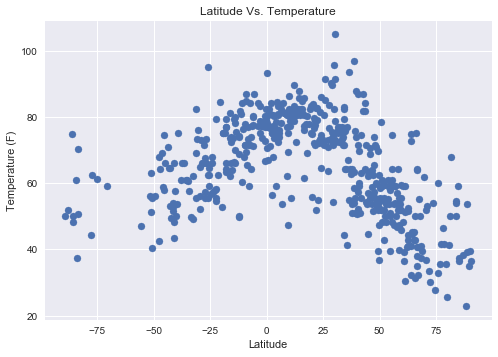

In [15]:
#Latitude Vs Temperature Scatter Plot
plt.scatter(new_data["Lat"],new_data["Temperature"],marker ="o")
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
sns.set()
plt.show()

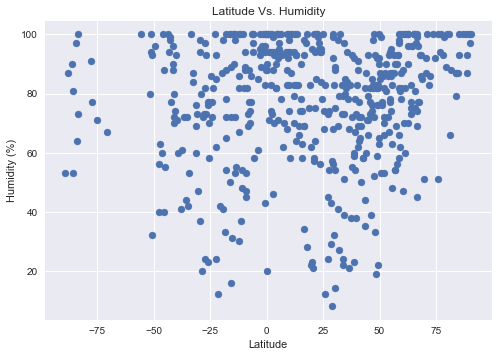

In [16]:
#Humidity Vs. Latitude Scatter Plot
plt.scatter(new_data["Lat"],new_data["Humidity"],marker ="o")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
sns.set()
plt.show()

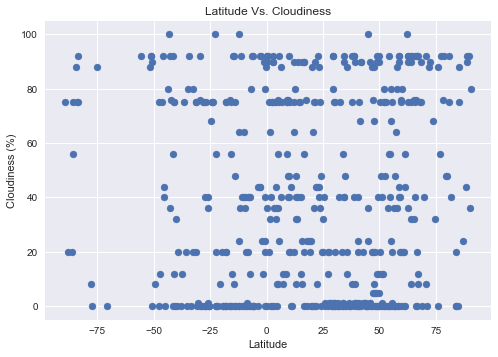

In [17]:
#Cloudiness Vs. Latitude Scatter Plot
plt.scatter(new_data["Lat"],new_data["Clouds"],marker ="o")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
sns.set()
plt.show()

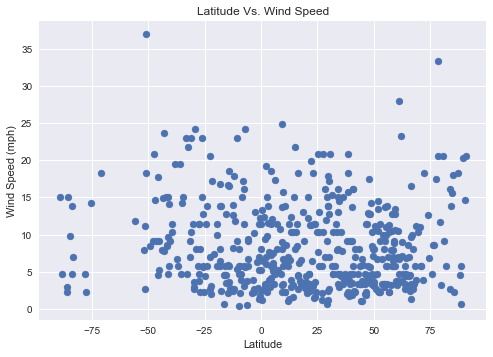

In [18]:
#Wind Speed Vs. Latitude Scatter Plot
plt.scatter(new_data["Lat"],new_data["Wind Speed"],marker ="o")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
sns.set()
plt.show()